# Diabetes Disease Prediction 

*Importing Libraries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

*Loading DataSet*

In [2]:
df_train = pd.read_csv('Training.csv')
df_test = pd.read_csv('Testing.csv')
df_train.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df_train.nunique()

Pregnancies                  17
Glucose                     123
BloodPressure                43
SkinThickness                50
Insulin                     144
BMI                         216
DiabetesPedigreeFunction    365
Age                          49
Outcome                       2
dtype: int64

In [4]:
df_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# EDA

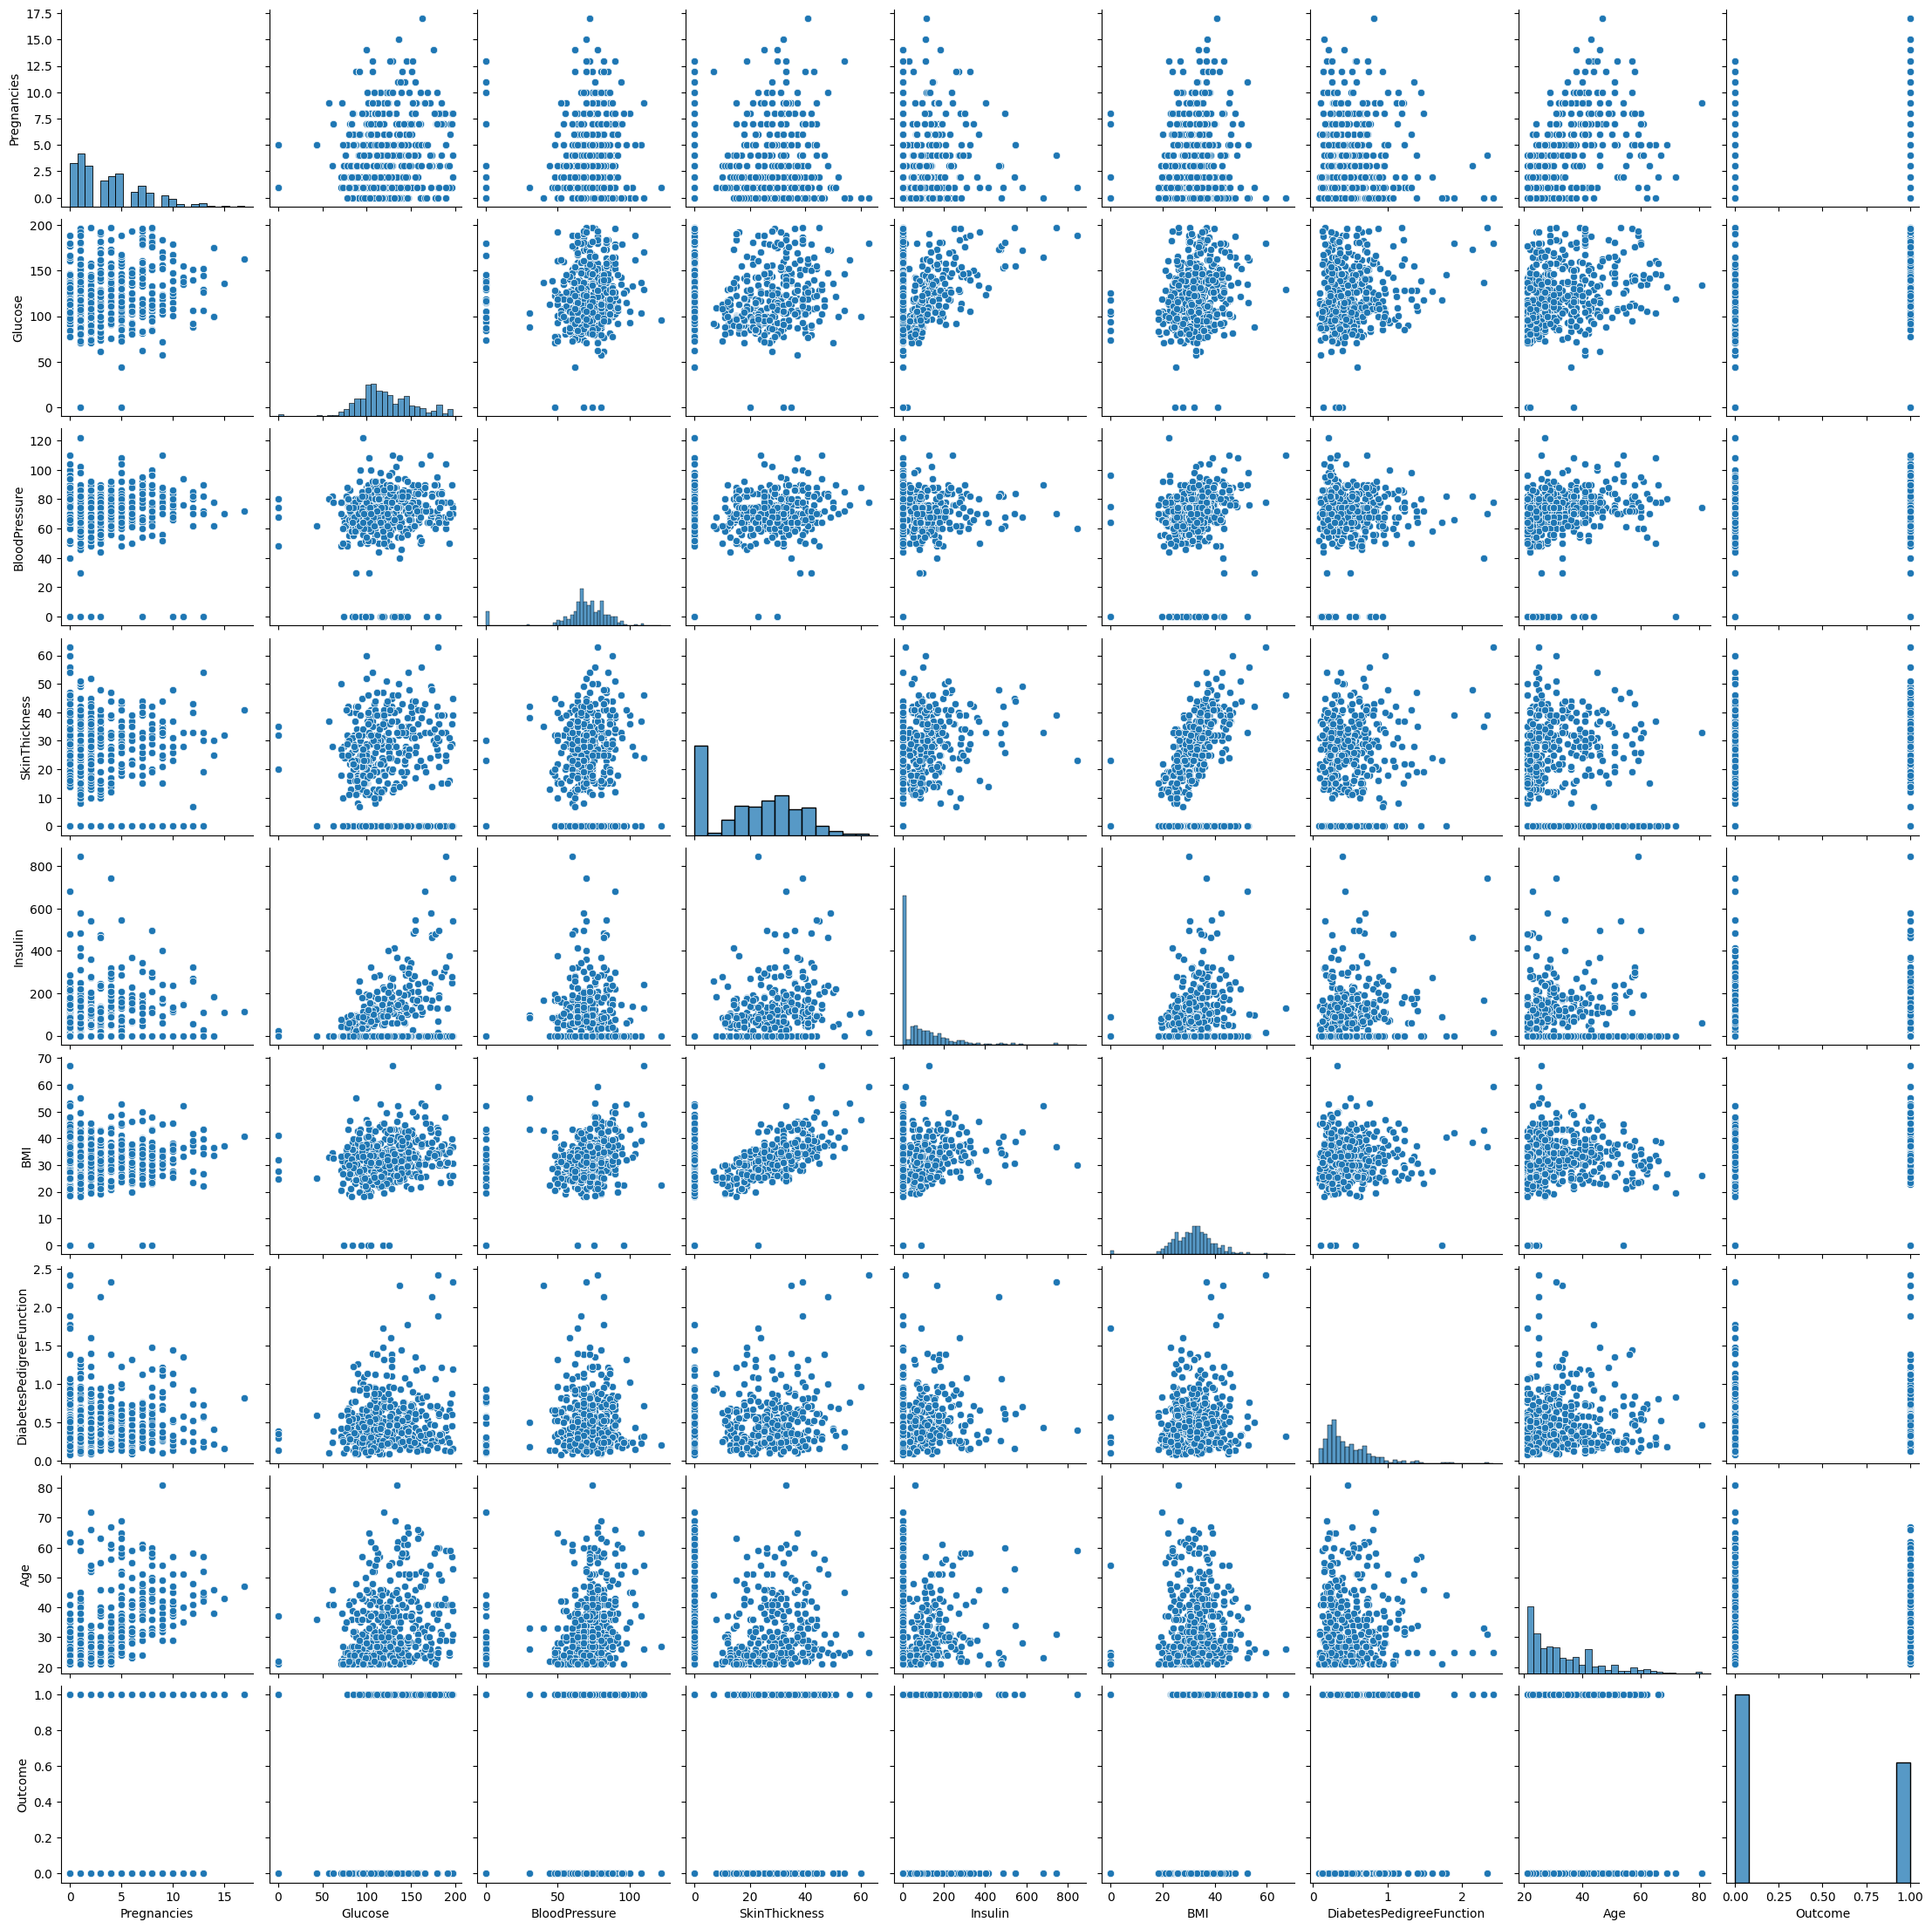

In [5]:
sns.pairplot(df_train)

<Axes: >

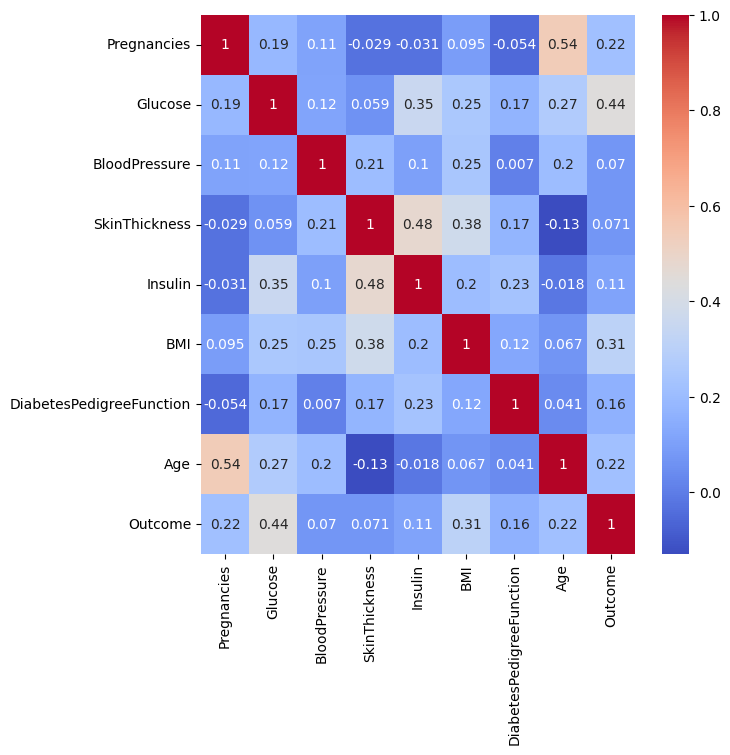

In [6]:
plt.figure(figsize=(7,7))
sns.heatmap(df_train.corr(),cmap='coolwarm',annot=True)

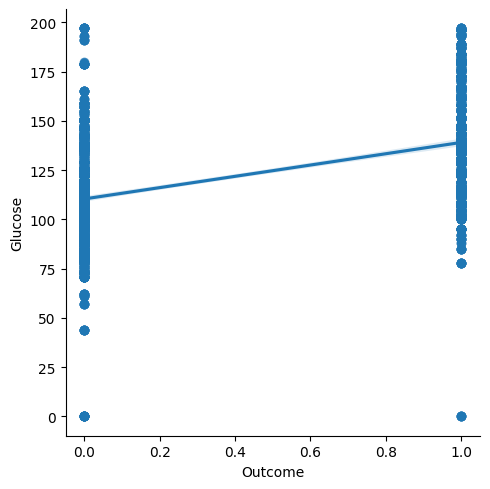

In [7]:
sns.lmplot(df_train,x='Outcome',y='Glucose')

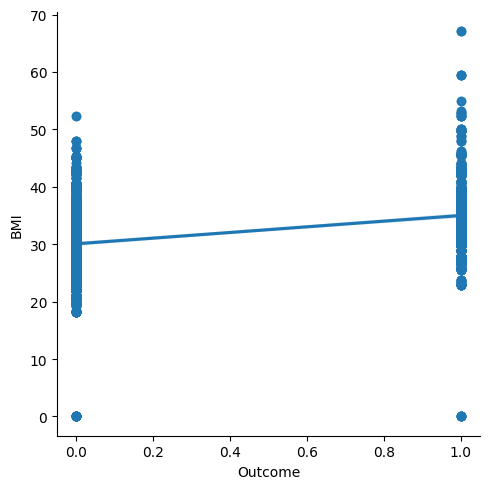

In [8]:
sns.lmplot(df_train,x='Outcome',y='BMI')

## Insights

- We Can See the Consumption of Insulin(Used To Control Gluscose) is Higher in Diabetes Patients  
- Higher Concentration Of gluscose Can Lead To Diabetes 
- Higher Body-Mass Index Ratio Also Acts As a Catalyst for Positive In Diabetes

# Model Training 

In [9]:
y_train = df_train['Outcome']
X_train = df_train.drop(['Outcome'],axis=1)
y_test = df_test['Outcome']
X_test = df_test.drop(['Outcome'],axis=1)

In [10]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(X_train,y_train)

LogisticRegression()

In [11]:
pred_lr = Lr.predict(X_test)

In [12]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_lr))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       215
           1       0.70      0.61      0.65        93

    accuracy                           0.80       308
   macro avg       0.77      0.75      0.76       308
weighted avg       0.80      0.80      0.80       308



## Fine-Tuning With Grid-Search 

In [13]:
from sklearn.model_selection import GridSearchCV
parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]
grid_search_Lr = GridSearchCV(estimator = Lr,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 4,
                           verbose=7,)
grid_search_Lr.fit(X_train, y_train) 

Fitting 4 folds for each of 6 candidates, totalling 24 fits
[CV 1/4] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 2/4] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 3/4] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 4/4] END ..........................penalty=l1;, score=nan total time=   0.0s
[CV 1/4] END ........................penalty=l2;, score=0.753 total time=   0.0s
[CV 2/4] END ........................penalty=l2;, score=0.720 total time=   0.0s
[CV 3/4] END ........................penalty=l2;, score=0.745 total time=   0.0s
[CV 4/4] END ........................penalty=l2;, score=0.753 total time=   0.0s
[CV 1/4] END ...............................C=1;, score=0.753 total time=   0.0s
[CV 2/4] END ...............................C=1;, score=0.720 total time=   0.0s
[CV 3/4] END ...............................C=1;, score=0.745 total time=   0.0s
[CV 4/4] END ...............................C=1;,

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy', verbose=7)

In [14]:
pred_gsLr =grid_search_Lr.predict(X_test)
grid_search_Lr.best_estimator_

LogisticRegression(C=10)

# Evaluation 

In [15]:
from sklearn.metrics import classification_report
print('\t\t\tReport Before Tuning\n\n',classification_report(y_test,pred_lr))
print('\n','*----------------------------------------------------*\n')

from sklearn.metrics import classification_report
print('\t\tReport after tuning with Grid-Search\n\n',classification_report(y_test,pred_gsLr))

			Report Before Tuning

               precision    recall  f1-score   support

           0       0.84      0.88      0.86       215
           1       0.70      0.61      0.65        93

    accuracy                           0.80       308
   macro avg       0.77      0.75      0.76       308
weighted avg       0.80      0.80      0.80       308


 *----------------------------------------------------*

		Report after tuning with Grid-Search

               precision    recall  f1-score   support

           0       0.85      0.89      0.87       215
           1       0.71      0.62      0.66        93

    accuracy                           0.81       308
   macro avg       0.78      0.76      0.76       308
weighted avg       0.80      0.81      0.80       308

